In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns




import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 엑셀 파일 불러오기

df = pd.read_excel("C:/Users/hanyo/Downloads/abalone.xlsx", engine="openpyxl")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [3]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [4]:
print("결측치 개수 확인:\n", df.isnull().sum())

결측치 개수 확인:
 id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [5]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

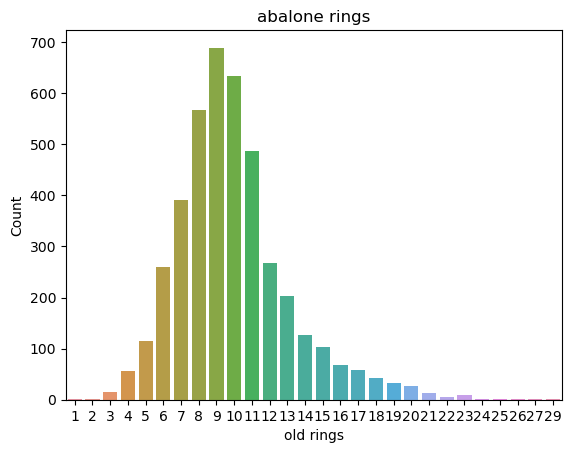

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [7]:
# 레이블 확인 (그래프, 숫자)

sns.countplot(data = df, x="Rings")
plt.xlabel("old rings")
plt.ylabel("Count")
plt.title("abalone rings")

plt.show()

df['Rings'].value_counts()


In [8]:
# 인코딩
encoder = LabelEncoder()
categorical_cols = ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']  # 변환할 칼럼 입력
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("\n변환 후 'Rings' 분포:\n", df['Rings'].value_counts())

# 최종 데이터 확인
print("\n 데이터 전처리 완료! 데이터프레임 미리보기:")
df


변환 후 'Rings' 분포:
 8     689
9     634
7     568
10    487
6     391
11    267
5     259
12    203
13    126
4     115
14    103
15     67
16     58
3      57
17     42
18     32
19     26
2      15
20     14
22      9
21      6
26      2
23      2
0       1
25      1
27      1
1       1
24      1
Name: Rings, dtype: int64

 데이터 전처리 완료! 데이터프레임 미리보기:


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,66,56,18,715,417,199,263,14
1,1,2,45,36,17,285,178,94,113,6
2,2,0,81,67,26,962,480,280,374,8
3,3,2,63,56,24,718,400,225,273,9
4,4,1,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,88,73,32,1289,698,475,442,10
4173,4173,2,93,71,26,1411,832,426,463,9
4174,4174,2,95,78,40,1727,994,571,550,8
4175,4175,0,100,80,29,1610,1005,518,530,9


In [9]:
X=df.drop('Rings',axis=1)
y=df['Rings']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [10]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.2574162679425837
[[ 0  0  0  3  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17 32  8  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8 55 28 20  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 18 52 54  9  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 25 72 38  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 13 50 49 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  9 10 30 47 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 11 23 40 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6 11 20 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6 10 12  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  4 12  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  

In [11]:
 # Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.20861244019138755
[[ 0  5  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  3  0  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  7  8  6 13  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4 20  4 20 10  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  9 54 32  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  8  7 45 64 10  2  0  1  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  4  2 33 61 39  4  0  4  2  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2 13 48 39 20  2  5  5  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  2 11 32 49 16  0  3  3  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5 28 24 16  0  8  2  0  8  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  9 13 12  1  9  2  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  5  9  2  1  8  3  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  3  2  0  6  3  0  3  0  0  0  1  0  0  0  0  0]
 [ 0

C:\Users\hanyo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.18373205741626794
[[ 2  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  7  1  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1 22  9  2  2  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 16 19  0 18  6  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0 10 21  3 44 26  2  3  2  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 12  3 54 32  8 14  3  7  0  0  0  4  0  1  0  0  0  0  0  0]
 [ 0  0  0  4  3 40 28  4 25  5 30  0  5  0  7  0  1  0  0  0  0  0  0]
 [ 0  0  1  5  1 16 24  4 36  4 27  0  7  1 10  1  2  0  0  0  0  0  0]
 [ 0  0  0  4  0  7 13 11 30 10 24  0  5  1 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  6  5 20  6 17  1  3  0 13  4  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  2  7  6 19  0  2  0  9  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  0  6  2 11  0  0  0  6  1  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  3  0  4  1  3  0  5  1  3  1  0  0  0  0  0]
 [ 0  0  

In [13]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.21626794258373205
[[ 1  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  4  4  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  8 10 14  6  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  1  6 20 16 13  3  2  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5 14 37 29 14  7  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1 11 28 40 21 15 15  4  3  0  1  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  6 10 28 35 25 21 11 10  1  1  0  1  2  1  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  6 16 27 39 21 12  6  5  3  3  1  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  3  4 10 24 25 15  7 15  9  5  0  2  2  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  2  3  4 13 16 16 12  7  5  4  3  4  2  0  1  1  0  0  0  0  0
   0]
 [ 0  0  0  0  1  3  4  6 11  5  8  5  1  1  3  1  0  1  1  0  0  0  0  0
   0]
 [ 0  0  0  0  1  2  8  2  5  1  2  4  2  0  2  0  0  2  0  0  0  

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.24497607655502393
[[ 0  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8 14 12  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9 20 22  7  3  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 27 34 32 12  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  4 19 56 37 16  3  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11 34 47 42 12  2  2  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2 19 32 39 28  8  5  1  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  9 35 35 27  4  2  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  2 19 25 24  4 12  3  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  6  8 15  9  3  2  2  2  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  5  6 10  0  2  3  0  1  0  0  0  3  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  4  6  3  4  2  2  0  0  0  0  0  0

In [16]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error



model = LinearRegression()

print('평균제곱근오차', mean_squared_error(pred, y_test))



from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

    

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()



from sklearn.svm import SVR

model = SVR(kernel='linear')

평균제곱근오차 5.754066985645933
